## TensorFlow 2.0부터는 Keras가 TensorFlow의 공식 API로 통합. - TensorFlow를 사용하여 Keras 모델을 구성하는 방법

### Sequential 모델
Sequential 모델은 Keras에서 제공하는 가장 간단한 모델 구성 방법. Sequential 모델은 레이어를 순차적으로 쌓아 나가는 방식으로 모델을 구성. 각 레이어는 이전 레이어의 출력을 입력으로 받는다.하나의 입력과 하나의 출력을 가지는 단일 흐름의 모델을 만들기에 적합
- TensorFlow와 Keras 가져오기:
- Sequential 모델 생성:
Sequential 모델은 레이어를 선형으로 쌓아서 만드는 가장 간단한 모델입니다.
- 레이어 추가:
모델에 레이어를 추가하여 모델의 구조를 정의합니다. Keras에서는 다양한 유형의 레이어를 제공합니다. 예를 들어, Dense(완전 연결 레이어), Conv2D(2D 컨볼루션 레이어), LSTM(장기 단기 메모리 레이어) 등이 있습니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
- 모델 예측:
- 모델 저장 및 로드:

### Functional API

Functional API는 복잡한 모델 구조를 지원하며, 다양한 연결 및 분기 구조를 갖는 네트워크를 생성하는 데 유용

- TensorFlow와 필요한 모듈 가져오기:
- 입력 레이어 정의:
모델의 입력 레이어를 정의합니다.
- 레이어 구성:
다양한 레이어를 사용하여 모델의 구조를 정의합니다. 각 레이어는 이전 레이어의 출력을 입력으로 받습니다.
- 모델 생성:
입력과 출력을 지정하여 모델을 생성합니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
훈련 데이터를 사용하여 모델을 학습시킵니다. 입력 데이터와 해당 출력 데이터를 제공해야 합니다.
- 모델 예측:
- 모델 저장 및 로드:

In [ ]:
# Sequential 방식
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(input_dim,)))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드


In [ ]:
# 함수 방식
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(input_dim,))

x = keras.layers.Dense(units=64, activation='relu')(inputs)
x = keras.layers.Dense(units=32, activation='relu')(x)
outputs = keras.layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드


## 영화 리뷰 분류: 이진 분류 예제

### IMDB 데이터셋

**IMDB 데이터셋 로드하기**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(25000,)

In [9]:
len(train_data[0])

218

In [10]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [11]:
import numpy as np
np.max(train_data[0])

7486

In [12]:
train_labels[0]

1

In [ ]:
# sequence의 최대값들을 입력으로 갖는 리스트에서 최대값
max([max(sequence) for sequence in train_data])

9999

**리뷰를 다시 텍스트로 디코딩하기**

In [ ]:
word_index = imdb.get_word_index() #  IMDB 데이터 세트의 단어 인덱스는 단어를 정수 인덱스에 매핑하는 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 딕셔너리의 키와 값의 위치를 바꾸어, 정수 인덱스를 해당하는 단어에 매핑하는 새로운 딕셔너리를 만든다.
# IMDB 데이터 세트에서 단어 인덱스는 3으로 오프셋되어 있습니다(즉, 실제 단어 인덱스는 데이터 세트에서 제공하는 인덱스에서 3을 뺀 값이라는 뜻)
# 이는 0, 1, 2가 "패딩", "문서 시작", "사전에 없음"을 나타내기 때문. 각 인덱스에서 3을 빼고, 이를 reverse_word_index를 통해 해당하는 단어를 찾고
# 만약 인덱스에 해당하는 단어가 없으면 "?"를 반환. 이렇게 찾은 단어들을 공백(" ")으로 이어 붙여서 하나의 문자열로 만든다.
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
decoded_review[:218]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director "

### 데이터 준비

**정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [ ]:
results = np.zeros((len(train_data), 10000))
for i, sequence in enumerate(train_data[0]):
  print(i,sequence)

In [16]:
# i는 현재 시퀀스의 인덱스, j는 시퀀스 내의 정수이며 각 리뷰에서 등장하는 단어의 인덱스 위치에 해당하는 열을 1로 만든다.

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
np.sum(x_train[24999])

95.0

In [23]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들기

**모델 정의하기**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**모델 컴파일하기**

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델 훈련하기**

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 55ms/step - loss: 0.5288 - accuracy: 0.7684 - val_loss: 0.3966 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3217 - accuracy: 0.8929 - val_loss: 0.3185 - val_accuracy: 0.8776
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2364 - accuracy: 0.9233 - val_loss: 0.3159 - val_accuracy: 0.8700
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1910 - accuracy: 0.9371 - val_loss: 0.2766 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1596 - accuracy: 0.9474 - val_loss: 0.2937 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1353 - accuracy: 0.9571 - val_loss: 0.2856 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1121 - accuracy: 0.9659 - val_loss: 0.3133 - val_accuracy: 0.8801
Epoch 8/20
30

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**훈련과 검증 손실 그리기**

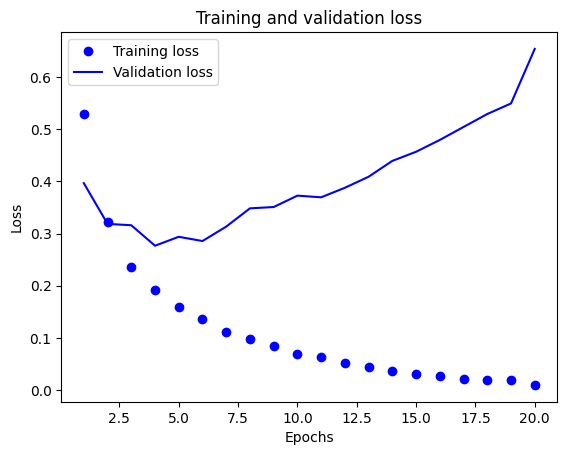

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

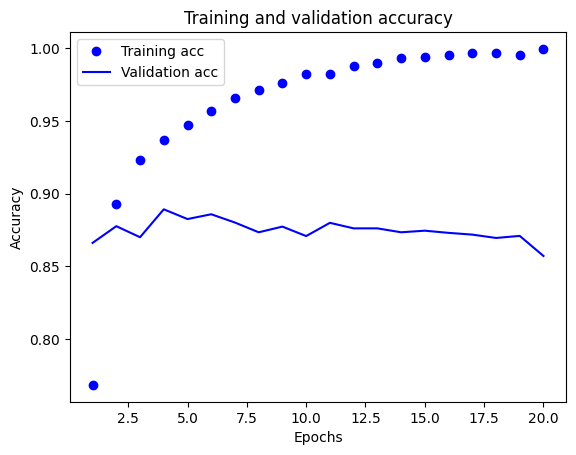

In [28]:
plt.clf() # 현재 활성화된 그림을 지우고 새로운 그림을 그릴 준비를 함
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [31]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
print()
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 11ms/step - loss: 0.4914 - accuracy: 0.8073
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2902 - accuracy: 0.8997
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2242 - accuracy: 0.9198
Epoch 4/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1905 - accuracy: 0.9313

782/782 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.8872


In [30]:
results

[0.30224350094795227, 0.8805199861526489]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.15315871],
       [0.9586573 ],
       [0.75667953],
       ...,
       [0.1147728 ],
       [0.07512458],
       [0.4015365 ]], dtype=float32)

### 추가 실험

### 정리

## 뉴스 기사 분류: 다중 분류 문제

### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [32]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [33]:
len(train_data)

8982

In [34]:
len(test_data)

2246

In [35]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

**로이터 데이터셋을 텍스트로 디코딩하기**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### 데이터 준비

**데이터 인코딩하기**

In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**레이블 인코딩하기**

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
# Keras 내장함수
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 모델 구성

**모델 정의하기**

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**모델 컴파일하기**

In [37]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련하기**

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 32ms/step - loss: 2.8041 - accuracy: 0.4478 - val_loss: 1.8774 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5867 - accuracy: 0.6708 - val_loss: 1.4092 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2150 - accuracy: 0.7375 - val_loss: 1.2224 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9906 - accuracy: 0.7927 - val_loss: 1.0930 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8259 - accuracy: 0.8261 - val_loss: 1.0363 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6904 - accuracy: 0.8545 - val_loss: 0.9787 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5793 - accuracy: 0.8805 - val_loss: 0.9228 - val_accuracy: 0.8040
Epoch 8/20
16

**훈련과 검증 손실 그리기**

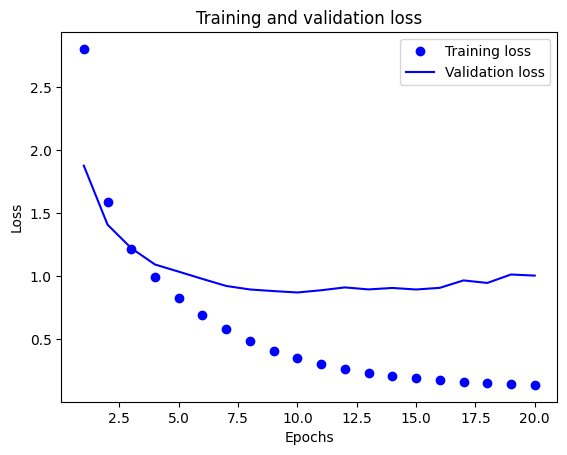

In [42]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

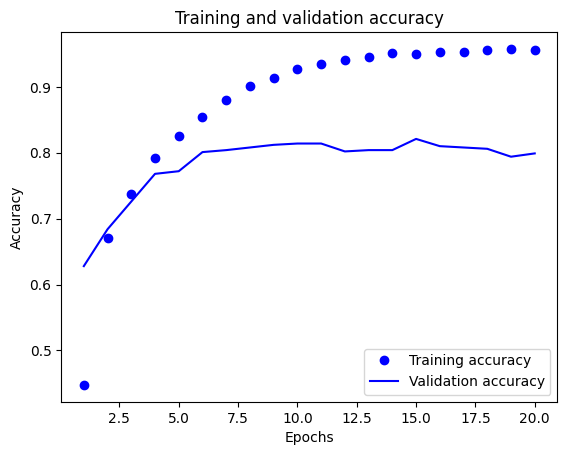

In [43]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [44]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 12ms/step - loss: 2.6414 - accuracy: 0.5073
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.4933 - accuracy: 0.6833
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.1459 - accuracy: 0.7494
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9280 - accuracy: 0.7961
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.7580 - accuracy: 0.8346
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6239 - accuracy: 0.8671
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5186 - accuracy: 0.8927
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4345 - accuracy: 0.9070
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.7850


In [45]:
results

[0.9123542904853821, 0.7849510312080383]

In [46]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19056099732858414

### 새로운 데이터로 예측하기

In [47]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [48]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

1.0

In [50]:
np.argmax(predictions[0])

4

### 레이블과 손실을 다루는 다른 방법

In [51]:
# 레이블을 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 충분히 큰 중간 층을 두어야 하는 이유

**정보 병목이 있는 모델**

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 9ms/step - loss: 2.7246 - accuracy: 0.3509 - val_loss: 1.9486 - val_accuracy: 0.5730
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6237 - accuracy: 0.5976 - val_loss: 1.5035 - val_accuracy: 0.6180
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2986 - accuracy: 0.6715 - val_loss: 1.3673 - val_accuracy: 0.6690
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1182 - accuracy: 0.7301 - val_loss: 1.2783 - val_accuracy: 0.6980
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0031 - accuracy: 0.7521 - val_loss: 1.2558 - val_accuracy: 0.7080
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9217 - accuracy: 0.7736 - val_loss: 1.2237 - val_accuracy: 0.7270
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8518 - accuracy: 0.7908 - val_loss: 1.2119 - val_accuracy: 0.7300
Epoch 8/20
63/63 [==

- 뉴런은 입력 데이터에서 학습된 가중치와 편향을 사용하여 출력을 계산합니다. units는 해당 레이어의 출력 차원 또는 뉴런의 개수를 결정
- 가중치의 수는 이전 레이어의 units 수와 현재 레이어의 units 수에 따라 결정됩니다. 이전 레이어의 각 뉴런과 현재 레이어의 각 뉴런 사이에 가중치가 존재하므로, 가중치의 수는 이 연결의 수와 동일
- units 수는 레이어의 출력 차원 또는 뉴런의 개수를 나타내고, 가중치의 수는 모델의 구조와 연결에 따라 결정됩니다. 가중치의 수는 units 수와 일치하지 않을 수 있습니다.

### 추가 실험

### 정리

## 주택 가격 예측: 회귀 문제

### 보스턴 주택 가격 데이터셋

**보스턴 주택 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 준비

**데이터 정규화하기**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 모델 구성

**모델 정의하기**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### K-겹 검증을 사용한 훈련 검증

**K-겹 검증하기**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
all_scores

[1.9948174953460693, 2.536346435546875, 2.4903550148010254, 2.3979060649871826]

In [ ]:
np.mean(all_scores)

2.354856252670288

**각 폴드의 검증 점수를 저장하기**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


**K-겹 검증 점수 평균을 기록하기**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**검증 점수 그래프 그리기**

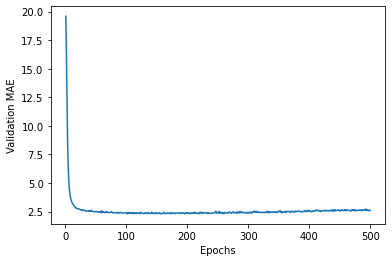

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기**

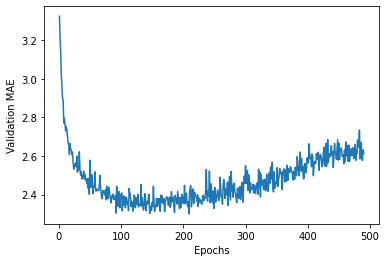

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**최종 모델 훈련하기**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.5936 - mae: 2.7210


In [ ]:
test_mae_score

2.7209510803222656

### 새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 4ms/step


array([6.934491], dtype=float32)

### 정리

## 요약